In [ ]:
# NN of two dense layers trained on MNIST dataset.
# with only backpropogation and no activation functions or optimizers.

Epoch 1/10, Average Loss: 0.0452, Accuracy: 0.8440
Epoch 2/10, Average Loss: 0.0402, Accuracy: 0.8463
Epoch 3/10, Average Loss: 0.0397, Accuracy: 0.8456
Epoch 4/10, Average Loss: 0.0394, Accuracy: 0.8472
Epoch 5/10, Average Loss: 0.0393, Accuracy: 0.8476
Epoch 6/10, Average Loss: 0.0392, Accuracy: 0.8481
Epoch 7/10, Average Loss: 0.0391, Accuracy: 0.8488
Epoch 8/10, Average Loss: 0.0390, Accuracy: 0.8487
Epoch 9/10, Average Loss: 0.0390, Accuracy: 0.8492
Epoch 10/10, Average Loss: 0.0389, Accuracy: 0.8489


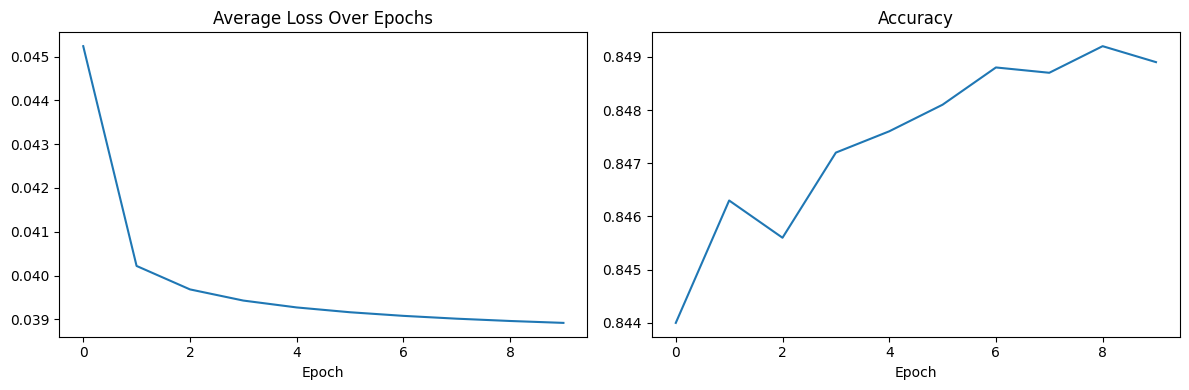

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
from keras.datasets import mnist
from keras.utils import to_categorical

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define neural network architecture
input_size = 28 * 28
hidden_size = 256  # Increased hidden layer size
output_size = 10

# Initialize weights with small random values
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
biases_output = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.001  # Adjusted learning rate
epochs = 10  # Increased number of epochs
batch_size = 64

# Training loop
history = {'loss': [], 'accuracy': []}

for epoch in range(epochs):
    epoch_loss = 0.0  # Accumulator for epoch training loss

    for i in range(0, len(train_images), batch_size):
        # Forward pass
        batch_images = train_images[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]

        hidden_layer_input = np.dot(batch_images, weights_input_hidden) + biases_hidden
        hidden_layer_output = hidden_layer_input
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_labels = output_layer_input

        # Compute loss
        loss = np.mean(np.square(predicted_labels - batch_labels))
        epoch_loss += loss

        # Backward pass (no activation, no optimizer, just gradient descent)
        output_error = predicted_labels - batch_labels
        weights_hidden_output_gradient = np.dot(hidden_layer_output.T, output_error)
        biases_output_gradient = np.sum(output_error, axis=0, keepdims=True)

        hidden_layer_error = np.dot(output_error, weights_hidden_output.T)
        weights_input_hidden_gradient = np.dot(batch_images.T, hidden_layer_error)
        biases_hidden_gradient = np.sum(hidden_layer_error, axis=0, keepdims=True)

        # Update weights and biases
        weights_input_hidden -= learning_rate * weights_input_hidden_gradient
        biases_hidden -= learning_rate * biases_hidden_gradient
        weights_hidden_output -= learning_rate * weights_hidden_output_gradient
        biases_output -= learning_rate * biases_output_gradient

    # Calculate average training loss for the epoch
    epoch_loss /= len(train_images) / batch_size
    history['loss'].append(epoch_loss)

    # Evaluate accuracy on the test set
    test_hidden_layer_output = np.dot(test_images, weights_input_hidden) + biases_hidden
    test_output_layer_input = np.dot(test_hidden_layer_output, weights_hidden_output) + biases_output
    test_predicted_labels = test_output_layer_input
    accuracy = np.mean(np.argmax(test_predicted_labels, axis=1) == np.argmax(test_labels, axis=1))
    history['accuracy'].append(accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Average Loss Over Epochs')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# No Optimizer with Backpropogation and only activation function.
#Sigmoid


Epoch 1/10, Train Loss: 2.03%, Train Accuracy: 68.65%
Epoch 2/10, Train Loss: 1.88%, Train Accuracy: 80.94%
Epoch 3/10, Train Loss: 1.82%, Train Accuracy: 84.64%
Epoch 4/10, Train Loss: 1.79%, Train Accuracy: 86.39%
Epoch 5/10, Train Loss: 1.76%, Train Accuracy: 87.04%
Epoch 6/10, Train Loss: 1.75%, Train Accuracy: 87.46%
Epoch 7/10, Train Loss: 1.74%, Train Accuracy: 87.67%
Epoch 8/10, Train Loss: 1.73%, Train Accuracy: 87.89%
Epoch 9/10, Train Loss: 1.73%, Train Accuracy: 88.08%
Epoch 10/10, Train Loss: 1.72%, Train Accuracy: 88.26%
Final Test Loss: 1.72%, Test Accuracy: 88.83%


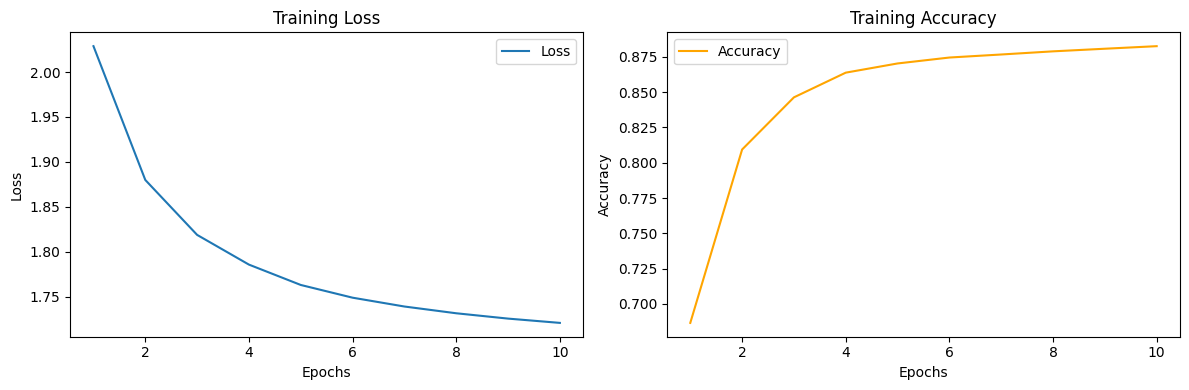

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess a subset of the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define the subset sizes (n and m)
n = 784  # Input size (28x28)
m = 10   # Output size

# Reshape and flatten the data, and adjust the output labels
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], -1)[:, :n]
x_test = x_test.reshape(x_test.shape[0], -1)[:, :n]
y_train = tf.one_hot(y_train, 10)[:, :m]
y_test = tf.one_hot(y_test, 10)[:, :m]

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define a class for the neural network
class TwoLayerDenseNN:
    def __init__(self, n, m):
        # Initialize weights and biases with small random values
        self.weights1 = np.random.randn(n, m) * 0.01
        self.bias1 = np.zeros((1, m))
        self.weights2 = np.random.randn(m, 10) * 0.01
        self.bias2 = np.zeros((1, 10))
        self.loss_history = []
        self.accuracy_history = []

    def forward(self, x):
        # Forward pass with sigmoid activation function
        self.layer1_input = sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.layer2_input = np.dot(self.layer1_input, self.weights2) + self.bias2
        return self.layer2_input

    def calculate_accuracy(self, x, y):
        predictions = self.forward(x)
        correct_predictions = np.argmax(predictions, axis=1) == np.argmax(y, axis=1)
        accuracy = np.mean(correct_predictions)
        return accuracy

    def calculate_loss(self, x, y):
        predictions = self.forward(x)
        exp_predictions = np.exp(predictions)
        softmax_predictions = exp_predictions / np.sum(exp_predictions, axis=1, keepdims=True)
        loss = -np.sum(y * np.log(softmax_predictions + 1e-10)) / len(x)
        return loss

    def backward(self, x, y, learning_rate):
        # Backward Pass (Backpropagation) with sigmoid activation
        dZ2 = self.layer2_input - y
        dW2 = np.outer(self.layer1_input, dZ2)
        db2 = dZ2
        dA1 = np.dot(dZ2, self.weights2.T)
        dZ1 = dA1 * sigmoid_derivative(self.layer1_input)
        dW1 = np.outer(x, dZ1)
        db1 = dZ1

        # Update weights and biases using SGD
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1

    def train(self, x_train, y_train, learning_rate, epochs):
        for epoch in range(epochs):
            for i in range(len(x_train)):
                x = x_train[i]
                y = y_train[i]

                # Forward Pass
                self.forward(x)

                # Calculate the Loss
                loss = self.calculate_loss(x, y)

                # Backward Pass
                self.backward(x, y, learning_rate)

            # Calculate training accuracy and loss for the epoch
            train_loss = self.calculate_loss(x_train, y_train)
            train_accuracy = self.calculate_accuracy(x_train, y_train)
            print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.2f}%, Train Accuracy: {train_accuracy * 100:.2f}%')

            # Save history
            self.loss_history.append(train_loss)
            self.accuracy_history.append(train_accuracy)

        # Calculate final test accuracy and loss
        test_loss = self.calculate_loss(x_test, y_test)
        test_accuracy = self.calculate_accuracy(x_test, y_test)
        print(f'Final Test Loss: {test_loss:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%')

    def plot_history(self):
        # Plot training history
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history, label='Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.accuracy_history) + 1), self.accuracy_history, label='Accuracy', color='orange')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Train the neural network using Sigmoid activation function
learning_rate = 0.001
epochs = 10

nn_sigmoid = TwoLayerDenseNN(n=n, m=m)

nn_sigmoid.train(x_train, y_train, learning_rate, epochs)
nn_sigmoid.plot_history()


Epoch 1/10, Train Loss: 1.9228, Train Accuracy: 81.12%
Epoch 2/10, Train Loss: 1.8749, Train Accuracy: 83.17%
Epoch 3/10, Train Loss: 1.8561, Train Accuracy: 84.00%
Epoch 4/10, Train Loss: 1.8455, Train Accuracy: 84.37%
Epoch 5/10, Train Loss: 1.8379, Train Accuracy: 84.67%
Epoch 6/10, Train Loss: 1.8315, Train Accuracy: 84.96%
Epoch 7/10, Train Loss: 1.8254, Train Accuracy: 85.19%
Epoch 8/10, Train Loss: 1.8190, Train Accuracy: 85.43%
Epoch 9/10, Train Loss: 1.8122, Train Accuracy: 85.73%
Epoch 10/10, Train Loss: 1.8050, Train Accuracy: 86.06%
Final Test Loss: 1.8001, Test Accuracy: 86.80%


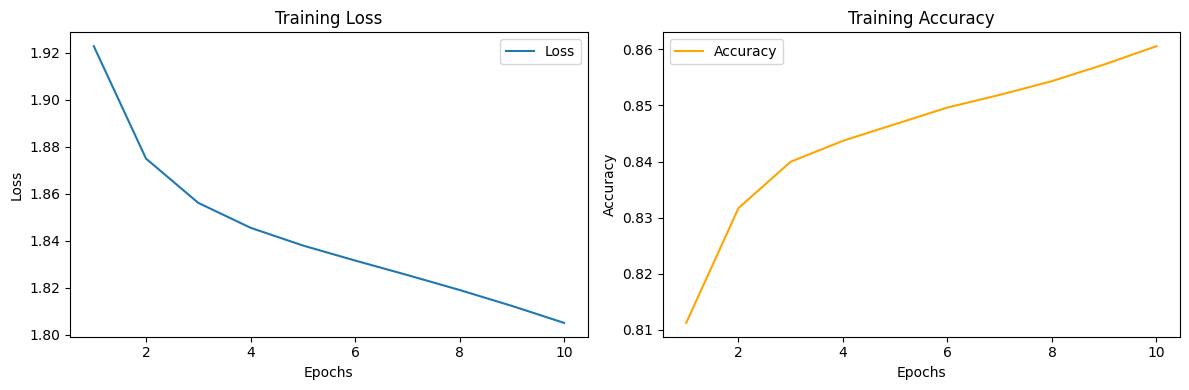

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess a subset of the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the input data
x_train_flatten = x_train.reshape(x_train.shape[0], -1)[:, :input_size]
x_test_flatten = x_test.reshape(x_test.shape[0], -1)[:, :input_size]

# One-hot encode the labels
num_classes = 10
y_train_one_hot = tf.one_hot(y_train, num_classes)[:, :output_size]
y_test_one_hot = tf.one_hot(y_test, num_classes)[:, :output_size]

# Neural network parameters
input_size = 28 * 28
hidden_size = 128
output_size = num_classes
learning_rate = 0.01
epochs = 10
batch_size = 32

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Define a class for the neural network
class TwoLayerDenseNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with small random values
        self.weights1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.bias2 = np.zeros((1, output_size))
        self.loss_history = []
        self.accuracy_history = []

    def forward(self, x):
        # Forward pass with sigmoid activation for the hidden layer and softmax for the output layer
        self.layer1_input = sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.layer2_input = np.dot(self.layer1_input, self.weights2) + self.bias2
        return softmax(self.layer2_input)

    def calculate_accuracy(self, x, y):
        predictions = self.forward(x)
        correct_predictions = np.argmax(predictions, axis=1) == np.argmax(y, axis=1)
        accuracy = np.mean(correct_predictions)
        return accuracy

    def calculate_loss(self, x, y):
        predictions = self.forward(x)
        loss = -np.sum(y * np.log(predictions + 1e-10)) / len(x)
        return loss

    def backward(self, x, y, learning_rate):
        # Backward Pass (Backpropagation)
        dZ2 = self.layer2_input - y
        dW2 = np.dot(self.layer1_input.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        dA1 = np.dot(dZ2, self.weights2.T)
        dZ1 = dA1 * self.layer1_input * (1 - self.layer1_input)
        dW1 = np.dot(x.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Update weights and biases using SGD
        self.weights2 -= learning_rate * dW2 / len(x)
        self.bias2 -= learning_rate * db2 / len(x)
        self.weights1 -= learning_rate * dW1 / len(x)
        self.bias1 -= learning_rate * db1 / len(x)

    def train(self, x_train, y_train, learning_rate, epochs, batch_size):
        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                # Mini-batch preparation
                batch_x = x_train[i:i+batch_size]
                batch_y = y_train[i:i+batch_size]

                # Forward and Backward Pass
                self.forward(batch_x)
                self.backward(batch_x, batch_y, learning_rate)

            # Calculate training accuracy and loss for the epoch
            train_loss = self.calculate_loss(x_train, y_train)
            train_accuracy = self.calculate_accuracy(x_train, y_train)
            print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%')

            # Save history
            self.loss_history.append(train_loss)
            self.accuracy_history.append(train_accuracy)

        # Calculate final test accuracy and loss
        test_loss = self.calculate_loss(x_test_flatten, y_test_one_hot)
        test_accuracy = self.calculate_accuracy(x_test_flatten, y_test_one_hot)
        print(f'Final Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

    def plot_history(self):
        # Plot training history
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history, label='Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.accuracy_history) + 1), self.accuracy_history, label='Accuracy', color='orange')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Initialize and train the neural network
nn = TwoLayerDenseNN(input_size, hidden_size, output_size)
nn.train(x_train_flatten, y_train_one_hot, learning_rate, epochs, batch_size)
nn.plot_history()


Epoch 1/10, Train Loss: 1.6597, Train Accuracy: 91.40%
Epoch 2/10, Train Loss: 1.6137, Train Accuracy: 93.60%
Epoch 3/10, Train Loss: 1.5914, Train Accuracy: 94.62%
Epoch 4/10, Train Loss: 1.5783, Train Accuracy: 95.28%
Epoch 5/10, Train Loss: 1.5695, Train Accuracy: 95.67%
Epoch 6/10, Train Loss: 1.5631, Train Accuracy: 95.95%
Epoch 7/10, Train Loss: 1.5580, Train Accuracy: 96.20%
Epoch 8/10, Train Loss: 1.5538, Train Accuracy: 96.40%
Epoch 9/10, Train Loss: 1.5504, Train Accuracy: 96.56%
Epoch 10/10, Train Loss: 1.5475, Train Accuracy: 96.68%
Final Test Loss: 1.5476, Test Accuracy: 96.17%


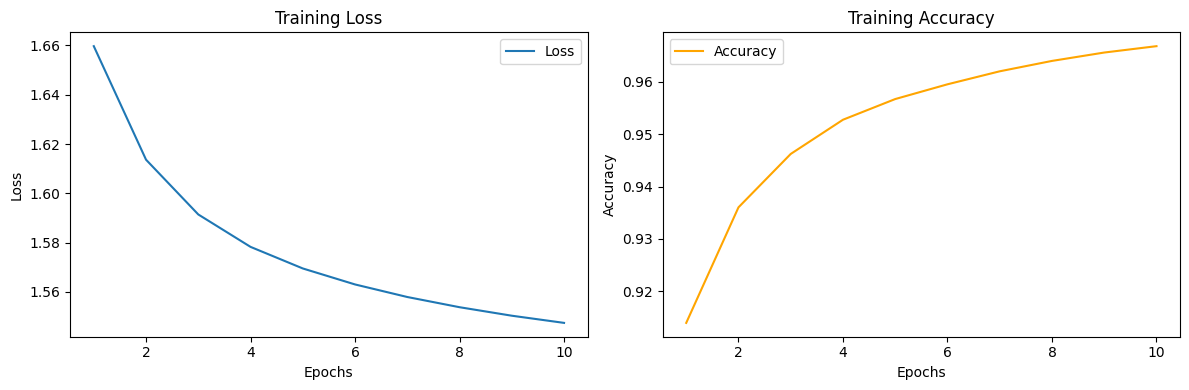

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess a subset of the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define the subset sizes (n and m)
n = 784  # Input size (28x28)
m = 10   # Output size

# Reshape and flatten the data, and adjust the output labels
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], -1)[:, :n]
x_test = x_test.reshape(x_test.shape[0], -1)[:, :n]
y_train = tf.one_hot(y_train, 10)[:, :m]
y_test = tf.one_hot(y_test, 10)[:, :m]

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Define a class for the neural network
class TwoLayerDenseNN:
    def __init__(self, n, m):
        # Initialize weights and biases with improved initialization
        self.weights1 = np.random.randn(n, 256) * np.sqrt(2 / n)
        self.bias1 = np.zeros((1, 256))
        self.weights2 = np.random.randn(256, m) * np.sqrt(2 / 256)
        self.bias2 = np.zeros((1, m))
        self.loss_history = []
        self.accuracy_history = []

    def forward(self, x):
        # Forward pass with sigmoid activation function
        self.layer1_input = sigmoid(np.dot(x, self.weights1) + self.bias1)
        self.layer2_input = np.dot(self.layer1_input, self.weights2) + self.bias2
        return self.layer2_input

    def calculate_accuracy(self, x, y):
        predictions = softmax(self.forward(x))
        correct_predictions = np.argmax(predictions, axis=1) == np.argmax(y, axis=1)
        accuracy = np.mean(correct_predictions)
        return accuracy

    def calculate_loss(self, x, y):
        predictions = self.forward(x)
        exp_predictions = np.exp(predictions)
        softmax_predictions = exp_predictions / np.sum(exp_predictions, axis=1, keepdims=True)
        loss = -np.sum(y * np.log(softmax_predictions + 1e-10)) / len(x)
        return loss

    def backward(self, x, y, learning_rate):
        # Backward Pass (Backpropagation) with sigmoid activation
        dZ2 = self.layer2_input - y
        dW2 = np.outer(self.layer1_input, dZ2)
        db2 = dZ2
        dA1 = np.dot(dZ2, self.weights2.T)
        dZ1 = dA1 * sigmoid_derivative(self.layer1_input)
        dW1 = np.outer(x, dZ1)
        db1 = dZ1

        # Update weights and biases using SGD
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1

    def train(self, x_train, y_train, learning_rate, epochs):
        for epoch in range(epochs):
            for i in range(len(x_train)):
                x = x_train[i]
                y = y_train[i]

                # Forward Pass
                self.forward(x)

                # Calculate the Loss
                loss = self.calculate_loss(x, y)

                # Backward Pass
                self.backward(x, y, learning_rate)

            # Calculate training accuracy and loss for the epoch
            train_loss = self.calculate_loss(x_train, y_train)
            train_accuracy = self.calculate_accuracy(x_train, y_train)
            print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%')

            # Save history
            self.loss_history.append(train_loss)
            self.accuracy_history.append(train_accuracy)

        # Calculate final test accuracy and loss
        test_loss = self.calculate_loss(x_test, y_test)
        test_accuracy = self.calculate_accuracy(x_test, y_test)
        print(f'Final Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

    def plot_history(self):
        # Plot training history
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history, label='Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.accuracy_history) + 1), self.accuracy_history, label='Accuracy', color='orange')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Train the neural network using Sigmoid activation function
learning_rate = 0.01
epochs = 10

nn_sigmoid = TwoLayerDenseNN(n=n, m=m)

nn_sigmoid.train(x_train, y_train, learning_rate, epochs)
nn_sigmoid.plot_history()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# No Optimizer with Backpropogation and only activation function.
# Tanh

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10, Loss: 0.8685, Accuracy: 0.7037
Epoch 2/10, Loss: 0.4140, Accuracy: 0.8741
Epoch 3/10, Loss: 0.3754, Accuracy: 0.8873
Epoch 4/10, Loss: 0.3454, Accuracy: 0.8962
Epoch 5/10, Loss: 0.3228, Accuracy: 0.9042
Epoch 6/10, Loss: 0.3102, Accuracy: 0.9094
Epoch 7/10, Loss: 0.3001, Accuracy: 0.9125
Epoch 8/10, Loss: 0.2914, Accuracy: 0.9157
Epoch 9/10, Loss: 0.2835, Accuracy: 0.9167
Epoch 10/10, Loss: 0.2765, Accuracy: 0.9190


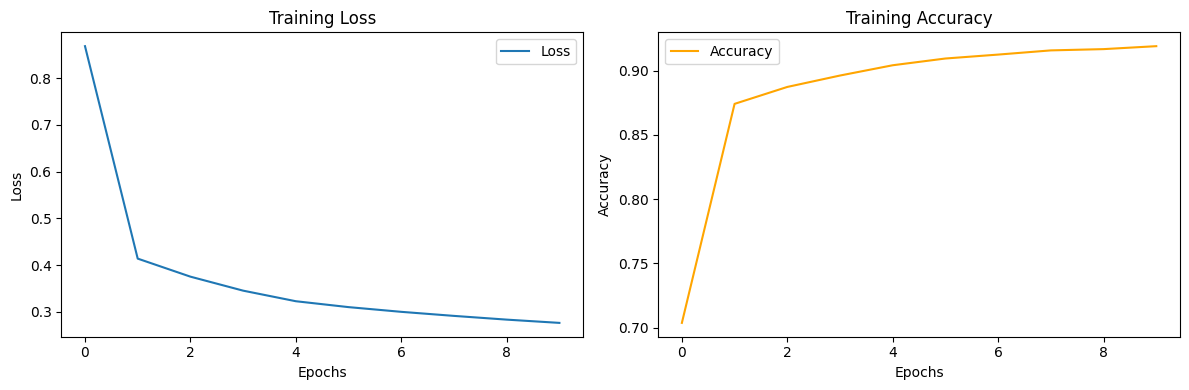

In [ ]:
#Tanh

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Training the neural network
history_loss = []
history_accuracy = []

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = np.tanh(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + 1e-8))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = (1 - np.tanh(hidden_layer_output) ** 2) * np.dot(output_error, weights_hidden_output.T)

        # Update weights using gradient descent
        weights_hidden_output -= learning_rate * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# No Optimizer with Backpropogation and only activation function.
# ReLU

Epoch 1/10, Loss: 0.7394, Accuracy: 0.8765
Epoch 2/10, Loss: 0.2684, Accuracy: 0.9306
Epoch 3/10, Loss: 0.2216, Accuracy: 0.9403
Epoch 4/10, Loss: 0.1969, Accuracy: 0.9455
Epoch 5/10, Loss: 0.1822, Accuracy: 0.9492
Epoch 6/10, Loss: 0.1664, Accuracy: 0.9534
Epoch 7/10, Loss: 0.1569, Accuracy: 0.9558
Epoch 8/10, Loss: 0.1450, Accuracy: 0.9593
Epoch 9/10, Loss: 0.1392, Accuracy: 0.9606
Epoch 10/10, Loss: 0.1325, Accuracy: 0.9621


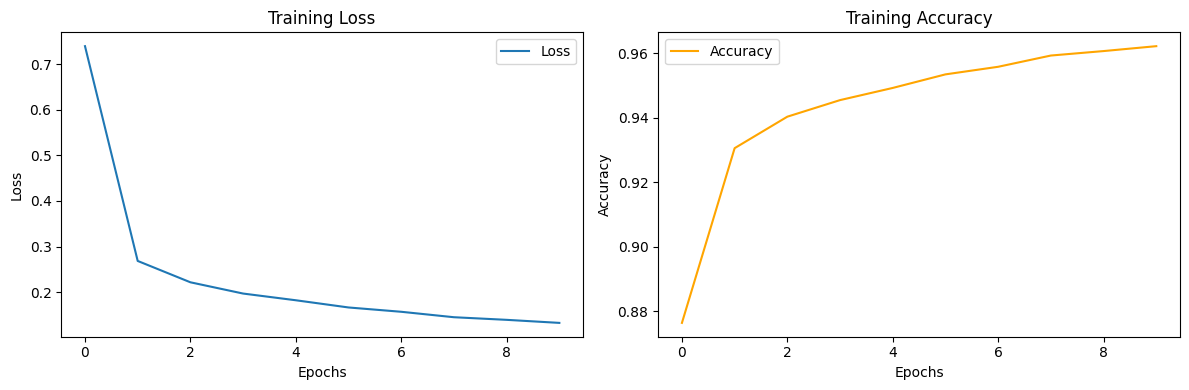

In [ ]:
#ReLU
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Training the neural network
history_loss = []
history_accuracy = []

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = relu(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + 1e-8))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = relu_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        # Update weights using gradient descent
        weights_hidden_output -= learning_rate * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


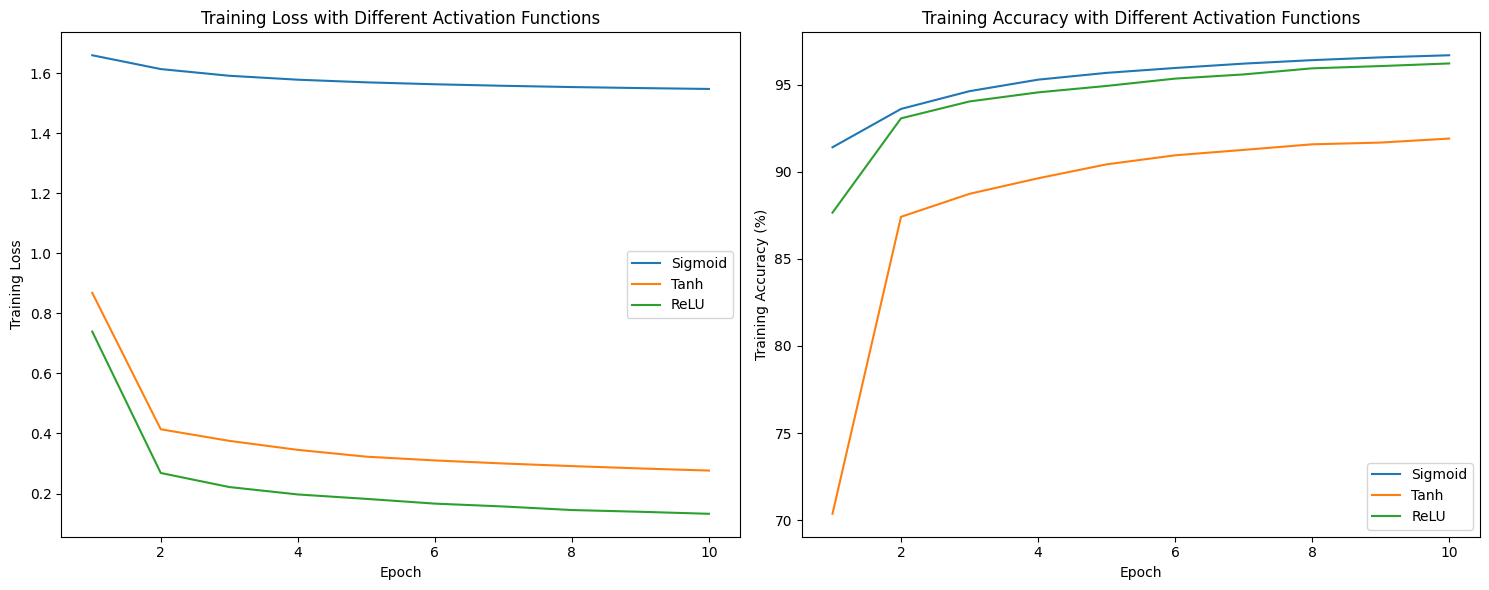

In [ ]:
import matplotlib.pyplot as plt

# Data for Sigmoid activation function
sigmoid_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sigmoid_train_loss = [1.6597, 1.6137, 1.5914, 1.5783, 1.5695, 1.5631, 1.5580, 1.5538, 1.5504, 1.5475]
sigmoid_train_accuracy = [91.40, 93.60, 94.62, 95.28, 95.67, 95.95, 96.20, 96.40, 96.56, 96.68]

# Data for Tanh activation function
tanh_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
tanh_train_loss = [0.8685, 0.4140, 0.3754, 0.3454, 0.3228, 0.3102, 0.3001, 0.2914, 0.2835, 0.2765]
tanh_train_accuracy = [70.37, 87.41, 88.73, 89.62, 90.42, 90.94, 91.25, 91.57, 91.67, 91.90]

# Data for ReLU activation function
relu_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
relu_train_loss = [0.7394, 0.2684, 0.2216, 0.1969, 0.1822, 0.1664, 0.1569, 0.1450, 0.1392, 0.1325]
relu_train_accuracy = [87.65, 93.06, 94.03, 94.55, 94.92, 95.34, 95.58, 95.93, 96.06, 96.21]

# Plotting the graphs for loss
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(sigmoid_epochs, sigmoid_train_loss, label='Sigmoid')
plt.plot(tanh_epochs, tanh_train_loss, label='Tanh')
plt.plot(relu_epochs, relu_train_loss, label='ReLU')
plt.title('Training Loss with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

# Plotting the graphs for accuracy
plt.subplot(1, 2, 2)
plt.plot(sigmoid_epochs, sigmoid_train_accuracy, label='Sigmoid')
plt.plot(tanh_epochs, tanh_train_accuracy, label='Tanh')
plt.plot(relu_epochs, relu_train_accuracy, label='ReLU')
plt.title('Training Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# AdaGrad with Backpropogation and NO activation function.

Epoch 1/10, Loss: 0.6940, Accuracy: 0.8437
Epoch 2/10, Loss: 0.4472, Accuracy: 0.8864
Epoch 3/10, Loss: 0.4016, Accuracy: 0.8949
Epoch 4/10, Loss: 0.3771, Accuracy: 0.8995
Epoch 5/10, Loss: 0.3610, Accuracy: 0.9034
Epoch 6/10, Loss: 0.3494, Accuracy: 0.9059
Epoch 7/10, Loss: 0.3404, Accuracy: 0.9078
Epoch 8/10, Loss: 0.3332, Accuracy: 0.9094
Epoch 9/10, Loss: 0.3271, Accuracy: 0.9110
Epoch 10/10, Loss: 0.3220, Accuracy: 0.9118


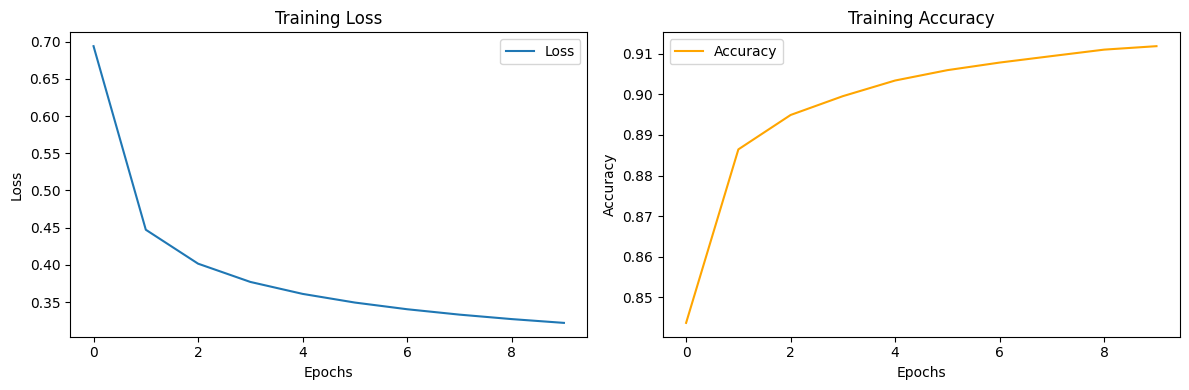

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10
epsilon = 1e-8  # Small constant to avoid division by zero

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Initialize squared gradient accumulators
squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Training the neural network
history_loss = []
history_accuracy = []

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = hidden_layer_input
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + epsilon))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = np.dot(output_error, weights_hidden_output.T)

        # Update weights using AdaGrad
        squared_gradients_hidden_output += np.outer(hidden_layer_output, output_error) ** 2
        squared_gradients_input_hidden += np.outer(input_layer, hidden_error) ** 2

        weights_hidden_output -= learning_rate / (np.sqrt(squared_gradients_hidden_output) + epsilon) * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate / (np.sqrt(squared_gradients_input_hidden) + epsilon) * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# AdaGrad with Backpropogation and sigmoid activation function.

Epoch 1/10, Loss: 2.2034, Accuracy: 0.2100
Epoch 2/10, Loss: 1.6175, Accuracy: 0.5455
Epoch 3/10, Loss: 1.2012, Accuracy: 0.6530
Epoch 4/10, Loss: 0.9917, Accuracy: 0.7131
Epoch 5/10, Loss: 0.8749, Accuracy: 0.7489
Epoch 6/10, Loss: 0.7982, Accuracy: 0.7732
Epoch 7/10, Loss: 0.7449, Accuracy: 0.7905
Epoch 8/10, Loss: 0.7054, Accuracy: 0.8016
Epoch 9/10, Loss: 0.6745, Accuracy: 0.8091
Epoch 10/10, Loss: 0.6498, Accuracy: 0.8157


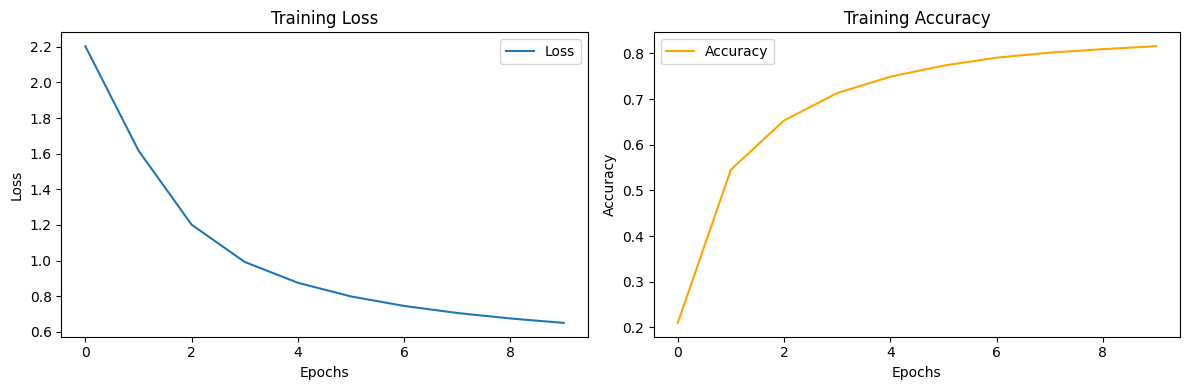

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10
epsilon = 1e-8  # Small constant to avoid division by zero

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Initialize squared gradient accumulators
squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Training the neural network
history_loss = []
history_accuracy = []

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)  # Sigmoid activation
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + epsilon))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = sigmoid_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        # Update weights using AdaGrad
        squared_gradients_hidden_output += np.outer(hidden_layer_output, output_error) ** 2
        squared_gradients_input_hidden += np.outer(input_layer, hidden_error) ** 2

        weights_hidden_output -= learning_rate / (np.sqrt(squared_gradients_hidden_output) + epsilon) * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate / (np.sqrt(squared_gradients_input_hidden) + epsilon) * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# AdaGrad with Backpropogation and Tanh activation function.

Epoch 1/10, Loss: 2.1663, Accuracy: 0.1970
Epoch 2/10, Loss: 1.3523, Accuracy: 0.5584
Epoch 3/10, Loss: 0.9753, Accuracy: 0.6891
Epoch 4/10, Loss: 0.8315, Accuracy: 0.7373
Epoch 5/10, Loss: 0.7475, Accuracy: 0.7572
Epoch 6/10, Loss: 0.6912, Accuracy: 0.7761
Epoch 7/10, Loss: 0.6509, Accuracy: 0.7920
Epoch 8/10, Loss: 0.6206, Accuracy: 0.8041
Epoch 9/10, Loss: 0.5966, Accuracy: 0.8142
Epoch 10/10, Loss: 0.5764, Accuracy: 0.8216


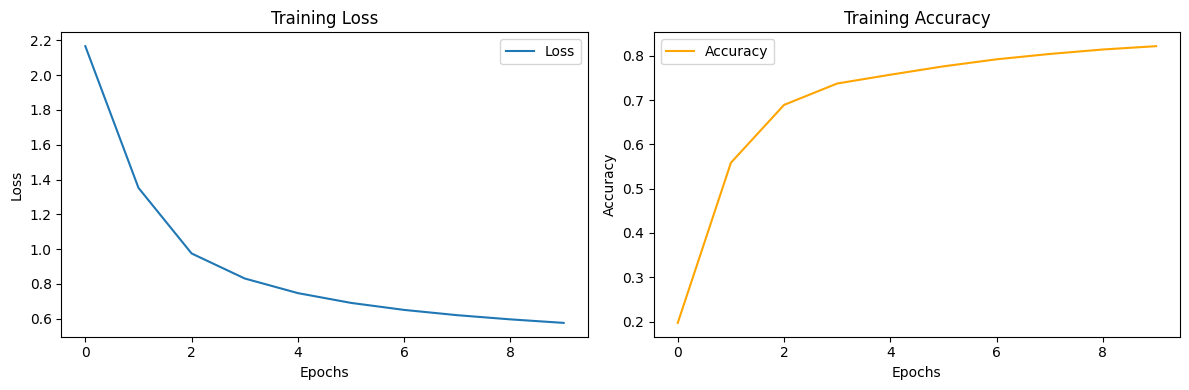

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10
epsilon = 1e-8  # Small constant to avoid division by zero

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Initialize squared gradient accumulators
squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Training the neural network
history_loss = []
history_accuracy = []

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = tanh(hidden_layer_input)  # Tanh activation
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + epsilon))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = tanh_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        # Update weights using AdaGrad
        squared_gradients_hidden_output += np.outer(hidden_layer_output, output_error) ** 2
        squared_gradients_input_hidden += np.outer(input_layer, hidden_error) ** 2

        weights_hidden_output -= learning_rate / (np.sqrt(squared_gradients_hidden_output) + epsilon) * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate / (np.sqrt(squared_gradients_input_hidden) + epsilon) * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# AdaGrad with Backpropogation and ReLU activation function.

Epoch 1/10, Loss: 0.7228, Accuracy: 0.8355
Epoch 2/10, Loss: 0.4510, Accuracy: 0.8853
Epoch 3/10, Loss: 0.4042, Accuracy: 0.8943
Epoch 4/10, Loss: 0.3793, Accuracy: 0.8995
Epoch 5/10, Loss: 0.3629, Accuracy: 0.9036
Epoch 6/10, Loss: 0.3510, Accuracy: 0.9061
Epoch 7/10, Loss: 0.3417, Accuracy: 0.9082
Epoch 8/10, Loss: 0.3342, Accuracy: 0.9098
Epoch 9/10, Loss: 0.3280, Accuracy: 0.9111
Epoch 10/10, Loss: 0.3227, Accuracy: 0.9121


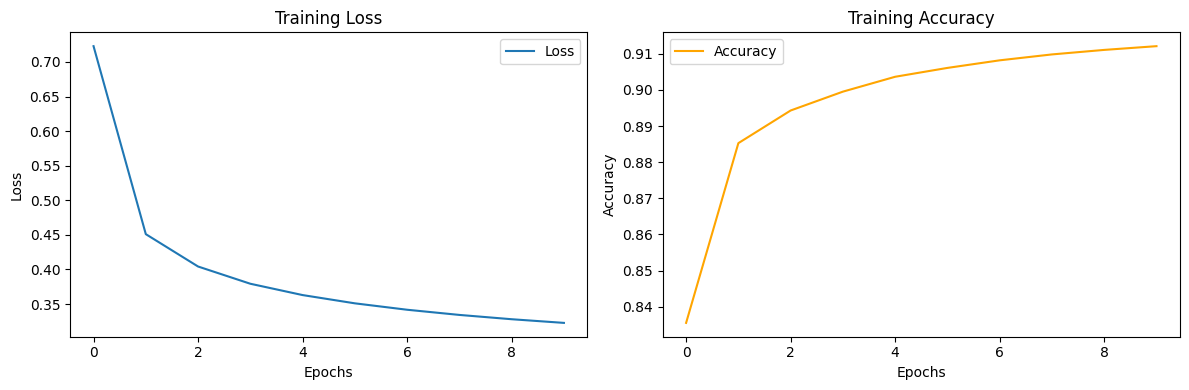

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10
epsilon = 1e-8  # Small constant to avoid division by zero

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Initialize squared gradient accumulators
squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Training the neural network
history_loss = []
history_accuracy = []

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = relu(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + epsilon))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = relu_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        # Update weights using AdaGrad
        squared_gradients_hidden_output += np.outer(hidden_layer_output, output_error) ** 2
        squared_gradients_input_hidden += np.outer(input_layer, hidden_error) ** 2

        weights_hidden_output -= learning_rate / (np.sqrt(squared_gradients_hidden_output) + epsilon) * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate / (np.sqrt(squared_gradients_input_hidden) + epsilon) * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# RMSProp with Backpropogation and NO activation function.

Epoch 1/10, Loss: 2.1434, Accuracy: 0.8339
Epoch 2/10, Loss: 1.8508, Accuracy: 0.8599
Epoch 4/10, Loss: 1.8290, Accuracy: 0.8617
Epoch 5/10, Loss: 1.8064, Accuracy: 0.8649
Epoch 6/10, Loss: 1.8236, Accuracy: 0.8675
Epoch 7/10, Loss: 1.8132, Accuracy: 0.8667
Epoch 8/10, Loss: 1.8703, Accuracy: 0.8667
Epoch 9/10, Loss: 1.8829, Accuracy: 0.8676
Epoch 10/10, Loss: 1.8866, Accuracy: 0.8681


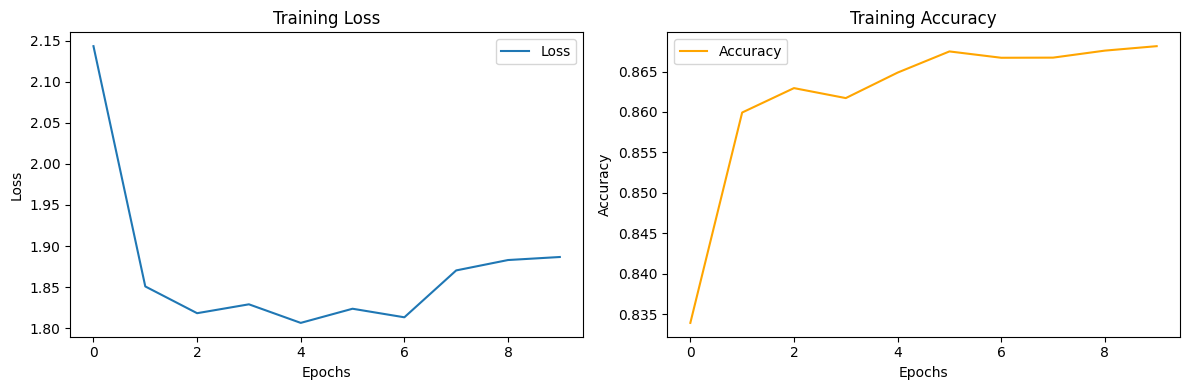

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10
beta = 0.9  # Decay factor for the moving average
epsilon = 1e-8  # Small constant to avoid division by zero

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Initialize squared gradient accumulators
squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Initialize moving average accumulators
moving_avg_squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
moving_avg_squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Training the neural network
history_loss = []
history_accuracy = []

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = hidden_layer_input
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + epsilon))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = np.dot(output_error, weights_hidden_output.T)

        # Update weights using RMSProp
        squared_gradients_hidden_output = beta * squared_gradients_hidden_output + (1 - beta) * np.square(np.outer(hidden_layer_output, output_error))
        squared_gradients_input_hidden = beta * squared_gradients_input_hidden + (1 - beta) * np.square(np.outer(input_layer, hidden_error))

        weights_hidden_output -= learning_rate / (np.sqrt(squared_gradients_hidden_output) + epsilon) * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate / (np.sqrt(squared_gradients_input_hidden) + epsilon) * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# RMSProp with Backpropogation and sigmoid activation function.

<ipython-input-11-42cc887db37c>:43: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1/10, Loss: 0.8027, Accuracy: 0.8586
Epoch 2/10, Loss: 0.9128, Accuracy: 0.8618
Epoch 3/10, Loss: 1.0439, Accuracy: 0.8329
Epoch 4/10, Loss: 1.2575, Accuracy: 0.7993
Epoch 5/10, Loss: 1.3794, Accuracy: 0.7812
Epoch 6/10, Loss: 1.3367, Accuracy: 0.8047
Epoch 7/10, Loss: 1.4039, Accuracy: 0.8143
Epoch 8/10, Loss: 1.3431, Accuracy: 0.8197
Epoch 9/10, Loss: 1.4171, Accuracy: 0.8130
Epoch 10/10, Loss: 1.4287, Accuracy: 0.7938


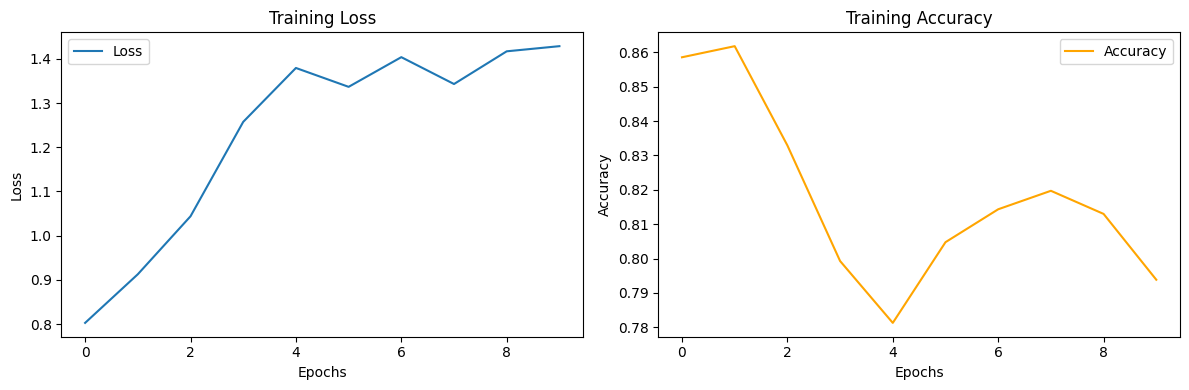

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10
beta = 0.9  # Decay factor for the moving average
epsilon = 1e-8  # Small constant to avoid division by zero

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Initialize squared gradient accumulators
squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Initialize moving average accumulators
moving_avg_squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
moving_avg_squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Training the neural network
history_loss = []
history_accuracy = []

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)  # Sigmoid activation
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + epsilon))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = sigmoid_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        # Update weights using RMSProp
        squared_gradients_hidden_output = beta * squared_gradients_hidden_output + (1 - beta) * np.square(np.outer(hidden_layer_output, output_error))
        squared_gradients_input_hidden = beta * squared_gradients_input_hidden + (1 - beta) * np.square(np.outer(input_layer, hidden_error))

        weights_hidden_output -= learning_rate / (np.sqrt(squared_gradients_hidden_output) + epsilon) * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate / (np.sqrt(squared_gradients_input_hidden) + epsilon) * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# RMSProp with Backpropogation and Tanh activation function.

Epoch 1/10, Loss: 0.5416, Accuracy: 0.8671
Epoch 2/10, Loss: 0.4870, Accuracy: 0.8881
Epoch 3/10, Loss: 0.4815, Accuracy: 0.8905
Epoch 4/10, Loss: 0.4833, Accuracy: 0.8899
Epoch 5/10, Loss: 0.4764, Accuracy: 0.8928
Epoch 6/10, Loss: 0.4753, Accuracy: 0.8925
Epoch 7/10, Loss: 0.4784, Accuracy: 0.8925
Epoch 8/10, Loss: 0.4845, Accuracy: 0.8910
Epoch 9/10, Loss: 0.4829, Accuracy: 0.8906
Epoch 10/10, Loss: 0.4885, Accuracy: 0.8896


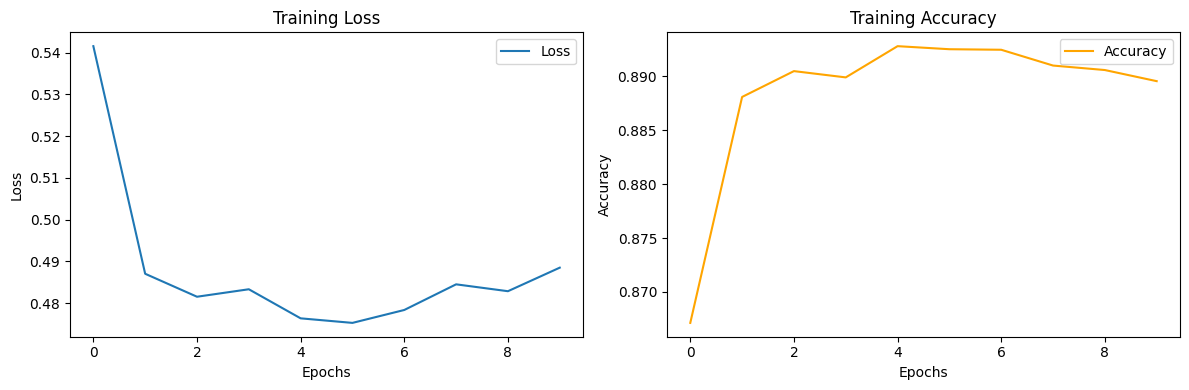

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10
beta = 0.9  # Decay factor for the moving average
epsilon = 1e-8  # Small constant to avoid division by zero

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Initialize squared gradient accumulators
squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Initialize moving average accumulators
moving_avg_squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
moving_avg_squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Training the neural network
history_loss = []
history_accuracy = []

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = tanh(hidden_layer_input)  # Tanh activation
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + epsilon))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = tanh_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        # Update weights using RMSProp
        squared_gradients_hidden_output = beta * squared_gradients_hidden_output + (1 - beta) * np.square(np.outer(hidden_layer_output, output_error))
        squared_gradients_input_hidden = beta * squared_gradients_input_hidden + (1 - beta) * np.square(np.outer(input_layer, hidden_error))

        weights_hidden_output -= learning_rate / (np.sqrt(squared_gradients_hidden_output) + epsilon) * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate / (np.sqrt(squared_gradients_input_hidden) + epsilon) * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# RMSProp with Backpropogation and ReLU activation function.

Epoch 1/10, Loss: 1.0880, Accuracy: 0.9012
Epoch 2/10, Loss: 0.6599, Accuracy: 0.9436
Epoch 3/10, Loss: 0.5825, Accuracy: 0.9530
Epoch 4/10, Loss: 0.5414, Accuracy: 0.9579
Epoch 5/10, Loss: 0.4974, Accuracy: 0.9610
Epoch 6/10, Loss: 0.4692, Accuracy: 0.9640
Epoch 7/10, Loss: 0.4447, Accuracy: 0.9659
Epoch 8/10, Loss: 0.4180, Accuracy: 0.9680
Epoch 9/10, Loss: 0.4120, Accuracy: 0.9689
Epoch 10/10, Loss: 0.3933, Accuracy: 0.9705


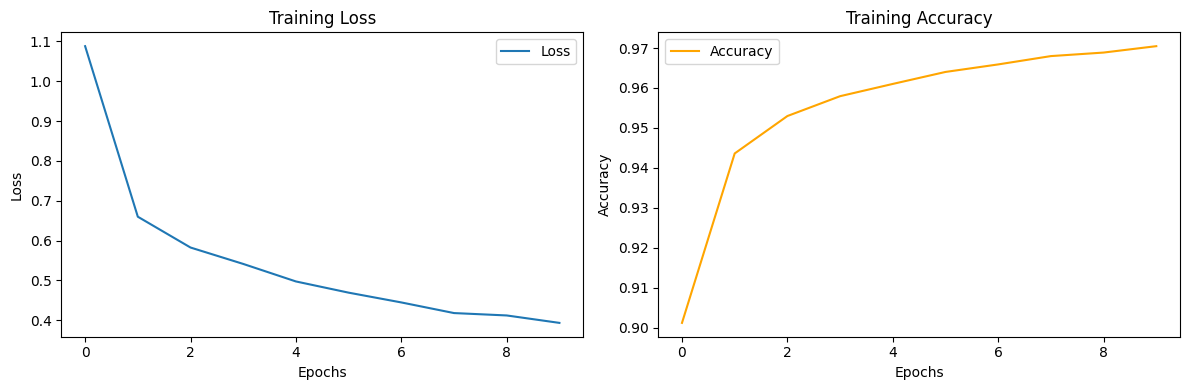

In [ ]:
#RMSProp with ReLU

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
num_classes = 10
y_train_one_hot = np.zeros((len(y_train), num_classes))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Neural network parameters
input_size = 28 * 28
hidden_size = 64
output_size = num_classes
learning_rate = 0.01
epochs = 10
beta = 0.9  # Decay factor for the moving average
epsilon = 1e-8  # Small constant to avoid division by zero

# Initialize weights with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Initialize squared gradient accumulators
squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Initialize moving average accumulators
moving_avg_squared_gradients_input_hidden = np.zeros_like(weights_input_hidden)
moving_avg_squared_gradients_hidden_output = np.zeros_like(weights_hidden_output)

# Training the neural network
history_loss = []
history_accuracy = []

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0

    for i in range(len(x_train)):
        # Forward pass
        input_layer = x_train[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden)
        hidden_layer_output = relu(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = np.exp(output_layer_input - np.max(output_layer_input)) / np.sum(
            np.exp(output_layer_input - np.max(output_layer_input))
        )  # Softmax

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(y_train_one_hot[i] * np.log(predicted_output + epsilon))
        total_loss += loss

        # Check accuracy
        if np.argmax(predicted_output) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        output_error = predicted_output - y_train_one_hot[i]
        hidden_error = relu_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        # Update weights using RMSProp
        squared_gradients_hidden_output = beta * squared_gradients_hidden_output + (1 - beta) * np.square(np.outer(hidden_layer_output, output_error))
        squared_gradients_input_hidden = beta * squared_gradients_input_hidden + (1 - beta) * np.square(np.outer(input_layer, hidden_error))

        weights_hidden_output -= learning_rate / (np.sqrt(squared_gradients_hidden_output) + epsilon) * np.outer(hidden_layer_output, output_error)
        weights_input_hidden -= learning_rate / (np.sqrt(squared_gradients_input_hidden) + epsilon) * np.outer(input_layer, hidden_error)

    average_loss = total_loss / len(x_train)
    accuracy = correct_predictions / len(x_train)
    history_loss.append(average_loss)
    history_accuracy.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_loss, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_accuracy, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# Adam optimizer with Backpropogation and NO activation function.

Epoch 1/10, Average Loss: 0.0439, Accuracy: 0.8301
Epoch 2/10, Average Loss: 0.0408, Accuracy: 0.8340
Epoch 3/10, Average Loss: 0.0403, Accuracy: 0.8278
Epoch 4/10, Average Loss: 0.0401, Accuracy: 0.8294
Epoch 5/10, Average Loss: 0.0399, Accuracy: 0.8288
Epoch 6/10, Average Loss: 0.0398, Accuracy: 0.8292
Epoch 7/10, Average Loss: 0.0397, Accuracy: 0.8312
Epoch 8/10, Average Loss: 0.0396, Accuracy: 0.8315
Epoch 9/10, Average Loss: 0.0396, Accuracy: 0.8322
Epoch 10/10, Average Loss: 0.0395, Accuracy: 0.8331


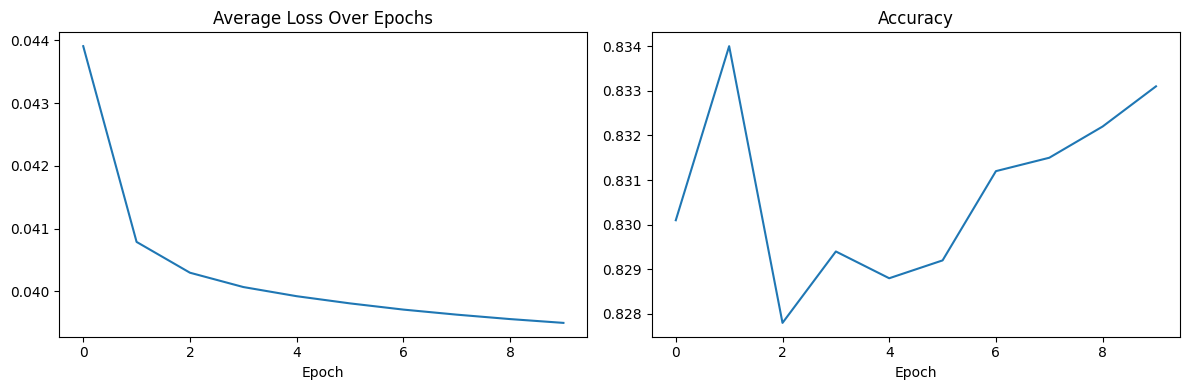

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define neural network architecture
input_size = 28 * 28
hidden_size = 256  # Increased hidden layer size
output_size = 10

# Initialize weights with small random values
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
biases_output = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.001  # Adjusted learning rate
epochs = 10  # Increased number of epochs
batch_size = 64

# Adam optimizer parameters
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Training loop
history = {'loss': [], 'accuracy': []}

m_weights_input_hidden = np.zeros_like(weights_input_hidden)
v_weights_input_hidden = np.zeros_like(weights_input_hidden)
m_weights_hidden_output = np.zeros_like(weights_hidden_output)
v_weights_hidden_output = np.zeros_like(weights_hidden_output)

m_biases_hidden = np.zeros_like(biases_hidden)
v_biases_hidden = np.zeros_like(biases_hidden)
m_biases_output = np.zeros_like(biases_output)
v_biases_output = np.zeros_like(biases_output)

for epoch in range(epochs):
    epoch_loss = 0.0  # Accumulator for epoch training loss

    for i in range(0, len(train_images), batch_size):
        # Forward pass
        batch_images = train_images[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]

        hidden_layer_input = np.dot(batch_images, weights_input_hidden) + biases_hidden
        hidden_layer_output = hidden_layer_input
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_labels = output_layer_input

        # Compute loss
        loss = np.mean(np.square(predicted_labels - batch_labels))
        epoch_loss += loss

        # Backward pass with Adam optimizer
        output_error = predicted_labels - batch_labels
        hidden_error = np.dot(output_error, weights_hidden_output.T)

        m_weights_hidden_output = beta1 * m_weights_hidden_output + (1 - beta1) * np.dot(hidden_layer_output.T, output_error)
        v_weights_hidden_output = beta2 * v_weights_hidden_output + (1 - beta2) * np.square(np.dot(hidden_layer_output.T, output_error))

        m_weights_input_hidden = beta1 * m_weights_input_hidden + (1 - beta1) * np.dot(batch_images.T, hidden_error)
        v_weights_input_hidden = beta2 * v_weights_input_hidden + (1 - beta2) * np.square(np.dot(batch_images.T, hidden_error))

        m_biases_output = beta1 * m_biases_output + (1 - beta1) * np.sum(output_error, axis=0, keepdims=True)
        v_biases_output = beta2 * v_biases_output + (1 - beta2) * np.square(np.sum(output_error, axis=0, keepdims=True))

        m_biases_hidden = beta1 * m_biases_hidden + (1 - beta1) * np.sum(hidden_error, axis=0, keepdims=True)
        v_biases_hidden = beta2 * v_biases_hidden + (1 - beta2) * np.square(np.sum(hidden_error, axis=0, keepdims=True))

        # Update weights and biases
        weights_hidden_output -= learning_rate * m_weights_hidden_output / (np.sqrt(v_weights_hidden_output) + epsilon)
        weights_input_hidden -= learning_rate * m_weights_input_hidden / (np.sqrt(v_weights_input_hidden) + epsilon)
        biases_output -= learning_rate * m_biases_output / (np.sqrt(v_biases_output) + epsilon)
        biases_hidden -= learning_rate * m_biases_hidden / (np.sqrt(v_biases_hidden) + epsilon)

    # Calculate average training loss for the epoch
    epoch_loss /= len(train_images) / batch_size
    history['loss'].append(epoch_loss)

    # Evaluate accuracy on the test set
    test_hidden_layer_output = np.dot(test_images, weights_input_hidden) + biases_hidden
    test_output_layer_input = np.dot(test_hidden_layer_output, weights_hidden_output) + biases_output
    test_predicted_labels = test_output_layer_input
    accuracy = np.mean(np.argmax(test_predicted_labels, axis=1) == np.argmax(test_labels, axis=1))
    history['accuracy'].append(accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Average Loss Over Epochs')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# Adam optimizer with Backpropogation and Sigmoid activation function.

Epoch 1/10, Average Loss: 0.0212, Accuracy: 0.9418
Epoch 2/10, Average Loss: 0.0116, Accuracy: 0.9564
Epoch 3/10, Average Loss: 0.0096, Accuracy: 0.9634
Epoch 4/10, Average Loss: 0.0085, Accuracy: 0.9664
Epoch 5/10, Average Loss: 0.0077, Accuracy: 0.9692
Epoch 6/10, Average Loss: 0.0071, Accuracy: 0.9705
Epoch 7/10, Average Loss: 0.0066, Accuracy: 0.9719
Epoch 8/10, Average Loss: 0.0062, Accuracy: 0.9733
Epoch 9/10, Average Loss: 0.0059, Accuracy: 0.9738
Epoch 10/10, Average Loss: 0.0056, Accuracy: 0.9746


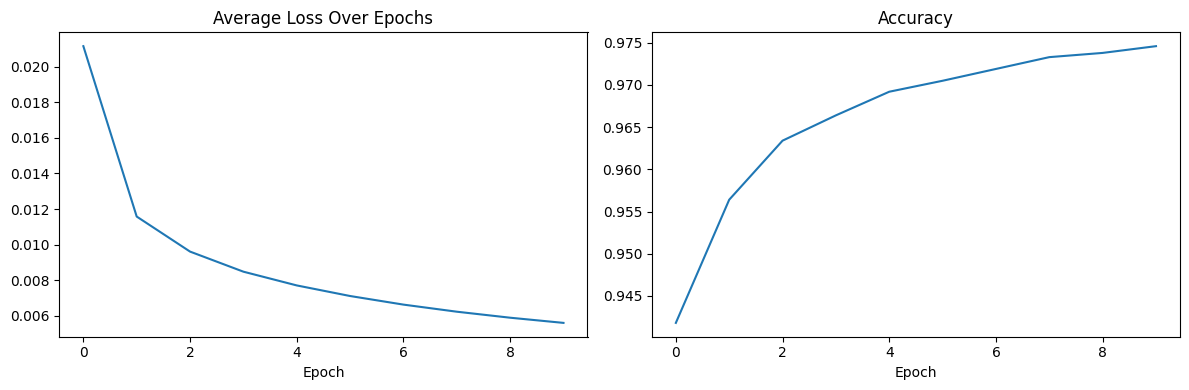

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
from keras.datasets import mnist
from keras.utils import to_categorical

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define neural network architecture
input_size = 28 * 28
hidden_size = 256  # Increased hidden layer size
output_size = 10

# Initialize weights with small random values
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
biases_output = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.001  # Adjusted learning rate
epochs = 10  # Increased number of epochs
batch_size = 64

# Adam optimizer parameters
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Training loop
history = {'loss': [], 'accuracy': []}

m_weights_input_hidden = np.zeros_like(weights_input_hidden)
v_weights_input_hidden = np.zeros_like(weights_input_hidden)
m_weights_hidden_output = np.zeros_like(weights_hidden_output)
v_weights_hidden_output = np.zeros_like(weights_hidden_output)

m_biases_hidden = np.zeros_like(biases_hidden)
v_biases_hidden = np.zeros_like(biases_hidden)
m_biases_output = np.zeros_like(biases_output)
v_biases_output = np.zeros_like(biases_output)

for epoch in range(epochs):
    epoch_loss = 0.0  # Accumulator for epoch training loss

    for i in range(0, len(train_images), batch_size):
        # Forward pass
        batch_images = train_images[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]

        hidden_layer_input = np.dot(batch_images, weights_input_hidden) + biases_hidden
        hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))  # Sigmoid activation
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_labels = output_layer_input

        # Compute loss
        loss = np.mean(np.square(predicted_labels - batch_labels))
        epoch_loss += loss

        # Backward pass with sigmoid activation and Adam optimizer
        output_error = predicted_labels - batch_labels
        hidden_error = hidden_layer_output * (1 - hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        m_weights_hidden_output = beta1 * m_weights_hidden_output + (1 - beta1) * np.dot(hidden_layer_output.T, output_error)
        v_weights_hidden_output = beta2 * v_weights_hidden_output + (1 - beta2) * np.square(np.dot(hidden_layer_output.T, output_error))

        m_weights_input_hidden = beta1 * m_weights_input_hidden + (1 - beta1) * np.dot(batch_images.T, hidden_error)
        v_weights_input_hidden = beta2 * v_weights_input_hidden + (1 - beta2) * np.square(np.dot(batch_images.T, hidden_error))

        m_biases_output = beta1 * m_biases_output + (1 - beta1) * np.sum(output_error, axis=0, keepdims=True)
        v_biases_output = beta2 * v_biases_output + (1 - beta2) * np.square(np.sum(output_error, axis=0, keepdims=True))

        m_biases_hidden = beta1 * m_biases_hidden + (1 - beta1) * np.sum(hidden_error, axis=0, keepdims=True)
        v_biases_hidden = beta2 * v_biases_hidden + (1 - beta2) * np.square(np.sum(hidden_error, axis=0, keepdims=True))

        # Update weights and biases
        weights_hidden_output -= learning_rate * m_weights_hidden_output / (np.sqrt(v_weights_hidden_output) + epsilon)
        weights_input_hidden -= learning_rate * m_weights_input_hidden / (np.sqrt(v_weights_input_hidden) + epsilon)
        biases_output -= learning_rate * m_biases_output / (np.sqrt(v_biases_output) + epsilon)
        biases_hidden -= learning_rate * m_biases_hidden / (np.sqrt(v_biases_hidden) + epsilon)

    # Calculate average training loss for the epoch
    epoch_loss /= len(train_images) / batch_size
    history['loss'].append(epoch_loss)

    # Evaluate accuracy on the test set
    test_hidden_layer_output = 1 / (1 + np.exp(-(np.dot(test_images, weights_input_hidden) + biases_hidden)))
    test_output_layer_input = np.dot(test_hidden_layer_output, weights_hidden_output) + biases_output
    test_predicted_labels = test_output_layer_input
    accuracy = np.mean(np.argmax(test_predicted_labels, axis=1) == np.argmax(test_labels, axis=1))
    history['accuracy'].append(accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Average Loss Over Epochs')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# Adam optimizer with Backpropogation and Tanh activation function.

Epoch 1/10, Average Loss: 0.0249, Accuracy: 0.9215
Epoch 2/10, Average Loss: 0.0159, Accuracy: 0.9321
Epoch 3/10, Average Loss: 0.0143, Accuracy: 0.9368
Epoch 4/10, Average Loss: 0.0134, Accuracy: 0.9398
Epoch 5/10, Average Loss: 0.0128, Accuracy: 0.9422
Epoch 6/10, Average Loss: 0.0123, Accuracy: 0.9451
Epoch 7/10, Average Loss: 0.0120, Accuracy: 0.9466
Epoch 8/10, Average Loss: 0.0117, Accuracy: 0.9480
Epoch 9/10, Average Loss: 0.0115, Accuracy: 0.9488
Epoch 10/10, Average Loss: 0.0113, Accuracy: 0.9489


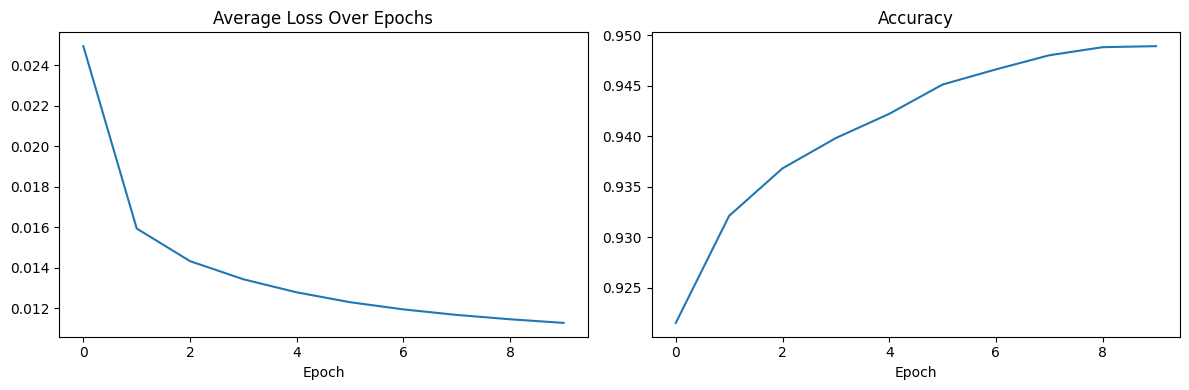

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
from keras.datasets import mnist
from keras.utils import to_categorical

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define neural network architecture
input_size = 28 * 28
hidden_size = 256  # Increased hidden layer size
output_size = 10

# Initialize weights with small random values
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
biases_output = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.001  # Adjusted learning rate
epochs = 10  # Increased number of epochs
batch_size = 64

# Adam optimizer parameters
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Training loop
history = {'loss': [], 'accuracy': []}

m_weights_input_hidden = np.zeros_like(weights_input_hidden)
v_weights_input_hidden = np.zeros_like(weights_input_hidden)
m_weights_hidden_output = np.zeros_like(weights_hidden_output)
v_weights_hidden_output = np.zeros_like(weights_hidden_output)

m_biases_hidden = np.zeros_like(biases_hidden)
v_biases_hidden = np.zeros_like(biases_hidden)
m_biases_output = np.zeros_like(biases_output)
v_biases_output = np.zeros_like(biases_output)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

for epoch in range(epochs):
    epoch_loss = 0.0  # Accumulator for epoch training loss

    for i in range(0, len(train_images), batch_size):
        # Forward pass
        batch_images = train_images[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]

        hidden_layer_input = np.dot(batch_images, weights_input_hidden) + biases_hidden
        hidden_layer_output = tanh(hidden_layer_input)  # Tanh activation
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_labels = output_layer_input

        # Compute loss
        loss = np.mean(np.square(predicted_labels - batch_labels))
        epoch_loss += loss

        # Backward pass with tanh activation and Adam optimizer
        output_error = predicted_labels - batch_labels
        hidden_error = tanh_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        m_weights_hidden_output = beta1 * m_weights_hidden_output + (1 - beta1) * np.dot(hidden_layer_output.T, output_error)
        v_weights_hidden_output = beta2 * v_weights_hidden_output + (1 - beta2) * np.square(np.dot(hidden_layer_output.T, output_error))

        m_weights_input_hidden = beta1 * m_weights_input_hidden + (1 - beta1) * np.dot(batch_images.T, hidden_error)
        v_weights_input_hidden = beta2 * v_weights_input_hidden + (1 - beta2) * np.square(np.dot(batch_images.T, hidden_error))

        m_biases_output = beta1 * m_biases_output + (1 - beta1) * np.sum(output_error, axis=0, keepdims=True)
        v_biases_output = beta2 * v_biases_output + (1 - beta2) * np.square(np.sum(output_error, axis=0, keepdims=True))

        m_biases_hidden = beta1 * m_biases_hidden + (1 - beta1) * np.sum(hidden_error, axis=0, keepdims=True)
        v_biases_hidden = beta2 * v_biases_hidden + (1 - beta2) * np.square(np.sum(hidden_error, axis=0, keepdims=True))

        # Update weights and biases
        weights_hidden_output -= learning_rate * m_weights_hidden_output / (np.sqrt(v_weights_hidden_output) + epsilon)
        weights_input_hidden -= learning_rate * m_weights_input_hidden / (np.sqrt(v_weights_input_hidden) + epsilon)
        biases_output -= learning_rate * m_biases_output / (np.sqrt(v_biases_output) + epsilon)
        biases_hidden -= learning_rate * m_biases_hidden / (np.sqrt(v_biases_hidden) + epsilon)

    # Calculate average training loss for the epoch
    epoch_loss /= len(train_images) / batch_size
    history['loss'].append(epoch_loss)

    # Evaluate accuracy on the test set
    test_hidden_layer_output = tanh(np.dot(test_images, weights_input_hidden) + biases_hidden)
    test_output_layer_input = np.dot(test_hidden_layer_output, weights_hidden_output) + biases_output
    test_predicted_labels = test_output_layer_input
    accuracy = np.mean(np.argmax(test_predicted_labels, axis=1) == np.argmax(test_labels, axis=1))
    history['accuracy'].append(accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Average Loss Over Epochs')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


In [ ]:
# NN of two dense layers trained on MNIST dataset.
# Adam optimizer with Backpropogation and ReLU activation function.

Epoch 1/10, Average Loss: 0.0214, Accuracy: 0.9327
Epoch 2/10, Average Loss: 0.0155, Accuracy: 0.9390
Epoch 3/10, Average Loss: 0.0145, Accuracy: 0.9418
Epoch 4/10, Average Loss: 0.0139, Accuracy: 0.9423
Epoch 5/10, Average Loss: 0.0134, Accuracy: 0.9437
Epoch 6/10, Average Loss: 0.0131, Accuracy: 0.9448
Epoch 7/10, Average Loss: 0.0129, Accuracy: 0.9436
Epoch 8/10, Average Loss: 0.0127, Accuracy: 0.9443
Epoch 9/10, Average Loss: 0.0125, Accuracy: 0.9437
Epoch 10/10, Average Loss: 0.0124, Accuracy: 0.9438


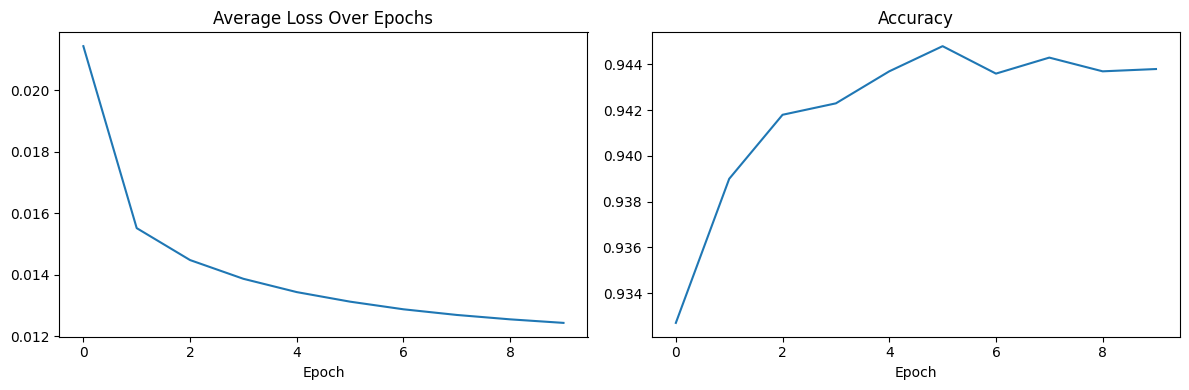

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
from keras.datasets import mnist
from keras.utils import to_categorical

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define neural network architecture
input_size = 28 * 28
hidden_size = 256  # Increased hidden layer size
output_size = 10

# Initialize weights with small random values
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
biases_output = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.002  # Adjusted learning rate
epochs = 10  # Increased number of epochs
batch_size = 64

# Adam optimizer parameters
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Training loop
history = {'loss': [], 'accuracy': []}

m_weights_input_hidden = np.zeros_like(weights_input_hidden)
v_weights_input_hidden = np.zeros_like(weights_input_hidden)
m_weights_hidden_output = np.zeros_like(weights_hidden_output)
v_weights_hidden_output = np.zeros_like(weights_hidden_output)

m_biases_hidden = np.zeros_like(biases_hidden)
v_biases_hidden = np.zeros_like(biases_hidden)
m_biases_output = np.zeros_like(biases_output)
v_biases_output = np.zeros_like(biases_output)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

for epoch in range(epochs):
    epoch_loss = 0.0  # Accumulator for epoch training loss

    for i in range(0, len(train_images), batch_size):
        # Forward pass
        batch_images = train_images[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]

        hidden_layer_input = np.dot(batch_images, weights_input_hidden) + biases_hidden
        hidden_layer_output = relu(hidden_layer_input)  # ReLU activation
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
        predicted_labels = output_layer_input

        # Compute loss
        loss = np.mean(np.square(predicted_labels - batch_labels))
        epoch_loss += loss

        # Backward pass with ReLU activation and Adam optimizer
        output_error = predicted_labels - batch_labels
        hidden_error = relu_derivative(hidden_layer_output) * np.dot(output_error, weights_hidden_output.T)

        m_weights_hidden_output = beta1 * m_weights_hidden_output + (1 - beta1) * np.dot(hidden_layer_output.T, output_error)
        v_weights_hidden_output = beta2 * v_weights_hidden_output + (1 - beta2) * np.square(np.dot(hidden_layer_output.T, output_error))

        m_weights_input_hidden = beta1 * m_weights_input_hidden + (1 - beta1) * np.dot(batch_images.T, hidden_error)
        v_weights_input_hidden = beta2 * v_weights_input_hidden + (1 - beta2) * np.square(np.dot(batch_images.T, hidden_error))

        m_biases_output = beta1 * m_biases_output + (1 - beta1) * np.sum(output_error, axis=0, keepdims=True)
        v_biases_output = beta2 * v_biases_output + (1 - beta2) * np.square(np.sum(output_error, axis=0, keepdims=True))

        m_biases_hidden = beta1 * m_biases_hidden + (1 - beta1) * np.sum(hidden_error, axis=0, keepdims=True)
        v_biases_hidden = beta2 * v_biases_hidden + (1 - beta2) * np.square(np.sum(hidden_error, axis=0, keepdims=True))

        # Update weights and biases
        weights_hidden_output -= learning_rate * m_weights_hidden_output / (np.sqrt(v_weights_hidden_output) + epsilon)
        weights_input_hidden -= learning_rate * m_weights_input_hidden / (np.sqrt(v_weights_input_hidden) + epsilon)
        biases_output -= learning_rate * m_biases_output / (np.sqrt(v_biases_output) + epsilon)
        biases_hidden -= learning_rate * m_biases_hidden / (np.sqrt(v_biases_hidden) + epsilon)

    # Calculate average training loss for the epoch
    epoch_loss /= len(train_images) / batch_size
    history['loss'].append(epoch_loss)

    # Evaluate accuracy on the test set
    test_hidden_layer_output = relu(np.dot(test_images, weights_input_hidden) + biases_hidden)
    test_output_layer_input = np.dot(test_hidden_layer_output, weights_hidden_output) + biases_output
    test_predicted_labels = test_output_layer_input
    accuracy = np.mean(np.argmax(test_predicted_labels, axis=1) == np.argmax(test_labels, axis=1))
    history['accuracy'].append(accuracy)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Average Loss Over Epochs')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


In [ ]:
#Optimizers with NO Activation

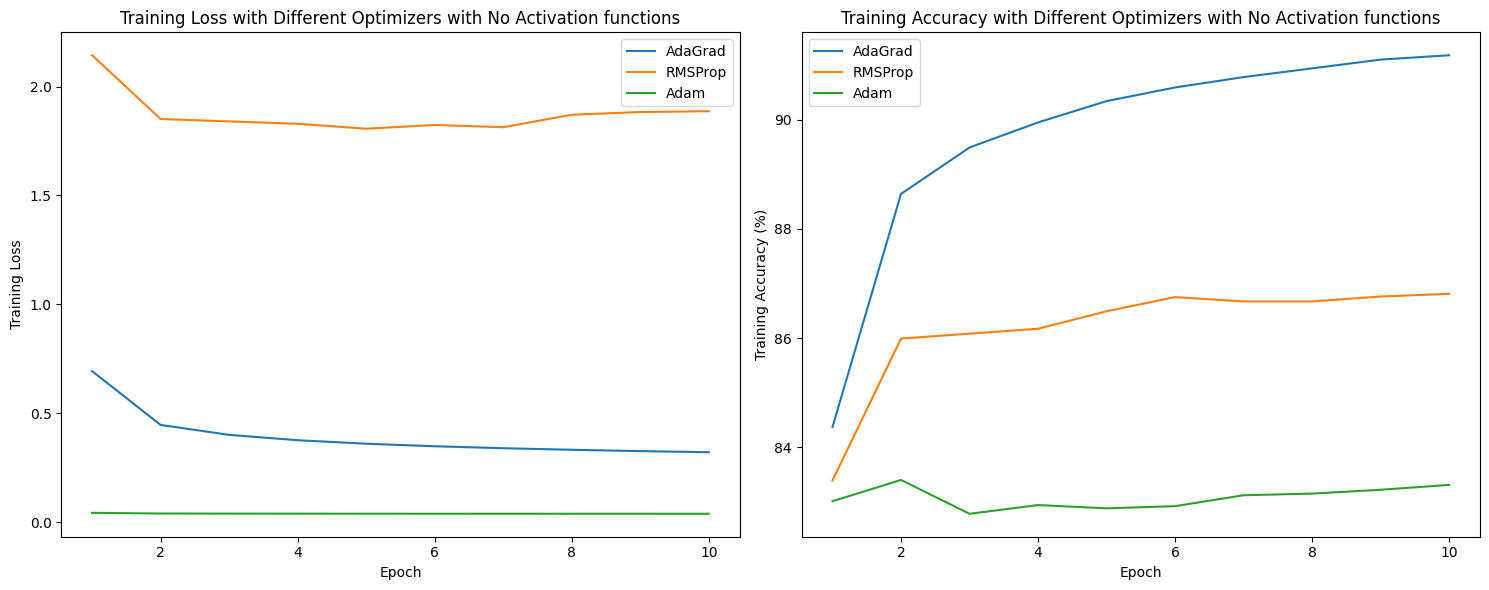

In [ ]:
import matplotlib.pyplot as plt

# Data for AdaGrad optimizer
adagrad_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
adagrad_loss = [0.6940, 0.4472, 0.4016, 0.3771, 0.3610, 0.3494, 0.3404, 0.3332, 0.3271, 0.3220]
adagrad_accuracy = [84.37, 88.64, 89.49, 89.95, 90.34, 90.59, 90.78, 90.94, 91.10, 91.18]

# Data for RMSProp optimizer
rmsprop_epochs = [1, 2, 4, 5, 6, 7, 8, 9, 10]
rmsprop_loss = [2.1434, 1.8508, 1.8290, 1.8064, 1.8236, 1.8132, 1.8703, 1.8829, 1.8866]
rmsprop_accuracy = [83.39, 85.99, 86.17, 86.49, 86.75, 86.67, 86.67, 86.76, 86.81]

# Data for Adam optimizer
adam_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
adam_loss = [0.0439, 0.0408, 0.0403, 0.0401, 0.0399, 0.0398, 0.0397, 0.0396, 0.0396, 0.0395]
adam_accuracy = [83.01, 83.40, 82.78, 82.94, 82.88, 82.92, 83.12, 83.15, 83.22, 83.31]

# Plotting the graphs for loss
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(adagrad_epochs, adagrad_loss, label='AdaGrad')
plt.plot(rmsprop_epochs, rmsprop_loss, label='RMSProp')
plt.plot(adam_epochs, adam_loss, label='Adam')
plt.title('Training Loss with Different Optimizers with No Activation functions')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

# Plotting the graphs for accuracy
plt.subplot(1, 2, 2)
plt.plot(adagrad_epochs, adagrad_accuracy, label='AdaGrad')
plt.plot(rmsprop_epochs, rmsprop_accuracy, label='RMSProp')
plt.plot(adam_epochs, adam_accuracy, label='Adam')
plt.title('Training Accuracy with Different Optimizers with No Activation functions')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Activation function sigmoid and diffenent Optimizers

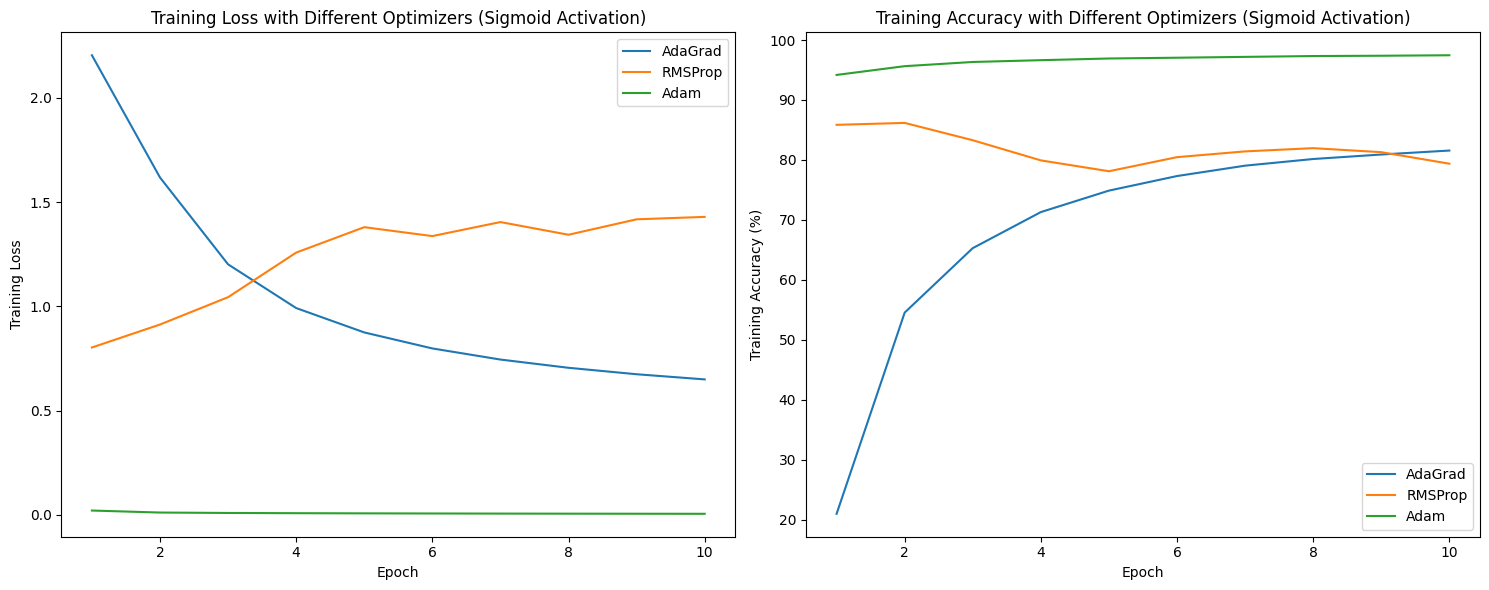

In [ ]:
import matplotlib.pyplot as plt

# Data for Sigmoid activation function with AdaGrad optimizer
adagrad_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
adagrad_loss = [2.2034, 1.6175, 1.2012, 0.9917, 0.8749, 0.7982, 0.7449, 0.7054, 0.6745, 0.6498]
adagrad_accuracy = [21.00, 54.55, 65.30, 71.31, 74.89, 77.32, 79.05, 80.16, 80.91, 81.57]

# Data for Sigmoid activation function with RMSProp optimizer
rmsprop_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rmsprop_loss = [0.8027, 0.9128, 1.0439, 1.2575, 1.3794, 1.3367, 1.4039, 1.3431, 1.4171, 1.4287]
rmsprop_accuracy = [85.86, 86.18, 83.29, 79.93, 78.12, 80.47, 81.43, 81.97, 81.30, 79.38]

# Data for Sigmoid activation function with Adam optimizer
adam_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
adam_loss = [0.0212, 0.0116, 0.0096, 0.0085, 0.0077, 0.0071, 0.0066, 0.0062, 0.0059, 0.0056]
adam_accuracy = [94.18, 95.64, 96.34, 96.64, 96.92, 97.05, 97.19, 97.33, 97.38, 97.46]

# Plotting the graphs for loss
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(adagrad_epochs, adagrad_loss, label='AdaGrad')
plt.plot(rmsprop_epochs, rmsprop_loss, label='RMSProp')
plt.plot(adam_epochs, adam_loss, label='Adam')
plt.title('Training Loss with Different Optimizers (Sigmoid Activation)')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

# Plotting the graphs for accuracy
plt.subplot(1, 2, 2)
plt.plot(adagrad_epochs, adagrad_accuracy, label='AdaGrad')
plt.plot(rmsprop_epochs, rmsprop_accuracy, label='RMSProp')
plt.plot(adam_epochs, adam_accuracy, label='Adam')
plt.title('Training Accuracy with Different Optimizers (Sigmoid Activation)')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Activation function Tanh and diffenent Optimizers

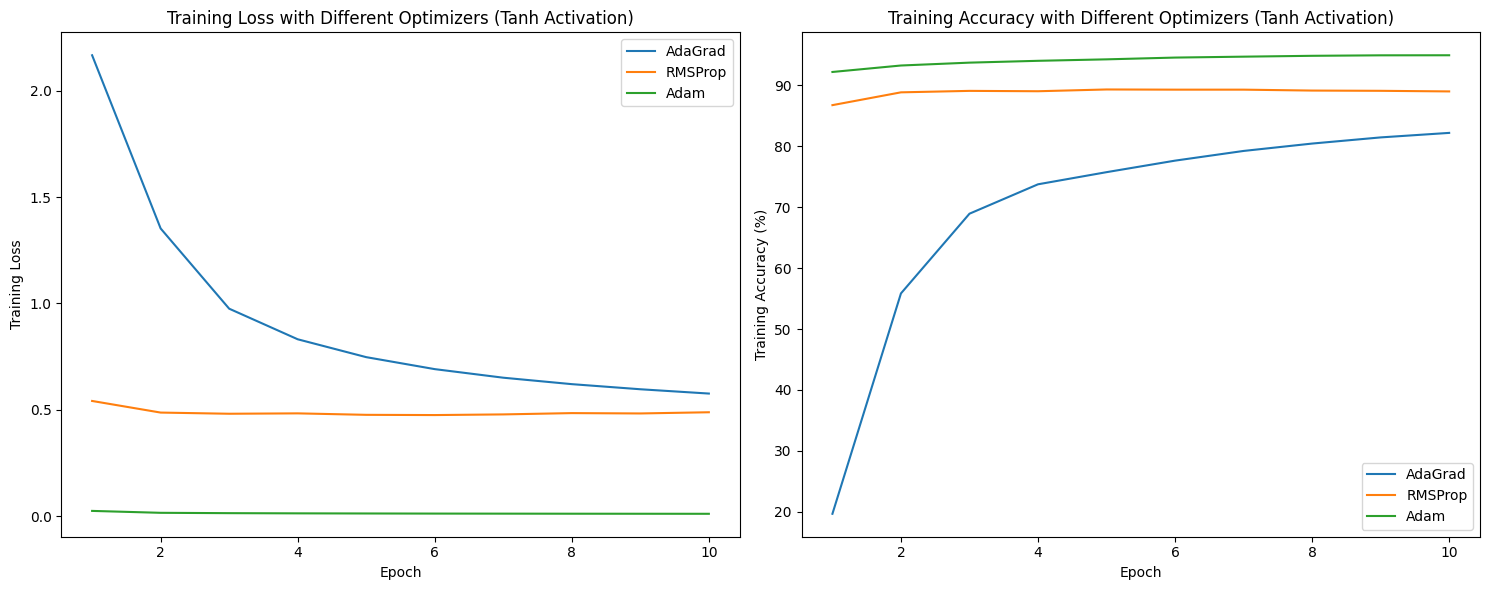

In [ ]:
import matplotlib.pyplot as plt

# Data for Sigmoid activation function with AdaGrad optimizer
adagrad_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
adagrad_loss = [2.1663, 1.3523, 0.9753, 0.8315, 0.7475, 0.6912, 0.6509, 0.6206, 0.5966, 0.5764]
adagrad_accuracy = [19.70, 55.84, 68.91, 73.73, 75.72, 77.61, 79.20, 80.41, 81.42, 82.16]

# Data for Sigmoid activation function with RMSProp optimizer
rmsprop_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rmsprop_loss = [0.5416, 0.4870, 0.4815, 0.4833, 0.4764, 0.4753, 0.4784, 0.4845, 0.4829, 0.4885]
rmsprop_accuracy = [86.71, 88.81, 89.05, 88.99, 89.28, 89.25, 89.25, 89.10, 89.06, 88.96]

# Data for Sigmoid activation function with Adam optimizer
adam_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
adam_loss = [0.0249, 0.0159, 0.0143, 0.0134, 0.0128, 0.0123, 0.0120, 0.0117, 0.0115, 0.0113]
adam_accuracy = [92.15, 93.21, 93.68, 93.98, 94.22, 94.51, 94.66, 94.80, 94.88, 94.89]

# Plotting the graphs for loss
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(adagrad_epochs, adagrad_loss, label='AdaGrad')
plt.plot(rmsprop_epochs, rmsprop_loss, label='RMSProp')
plt.plot(adam_epochs, adam_loss, label='Adam')
plt.title('Training Loss with Different Optimizers (Tanh Activation)')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

# Plotting the graphs for accuracy
plt.subplot(1, 2, 2)
plt.plot(adagrad_epochs, adagrad_accuracy, label='AdaGrad')
plt.plot(rmsprop_epochs, rmsprop_accuracy, label='RMSProp')
plt.plot(adam_epochs, adam_accuracy, label='Adam')
plt.title('Training Accuracy with Different Optimizers (Tanh Activation)')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Activation function ReLU and diffenent Optimizers

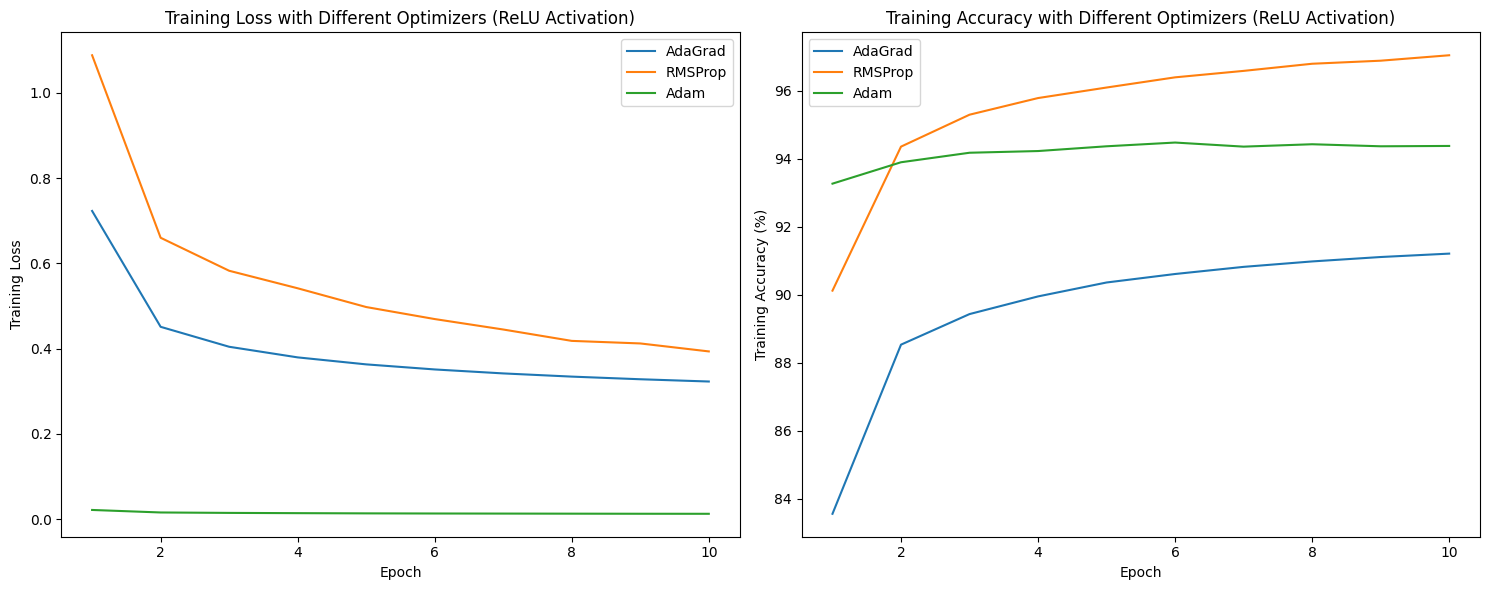

In [ ]:
import matplotlib.pyplot as plt

# Data for ReLU activation function with AdaGrad optimizer
adagrad_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
adagrad_loss = [0.7228, 0.4510, 0.4042, 0.3793, 0.3629, 0.3510, 0.3417, 0.3342, 0.3280, 0.3227]
adagrad_accuracy = [83.55, 88.53, 89.43, 89.95, 90.36, 90.61, 90.82, 90.98, 91.11, 91.21]

# Data for ReLU activation function with RMSProp optimizer
rmsprop_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rmsprop_loss = [1.0880, 0.6599, 0.5825, 0.5414, 0.4974, 0.4692, 0.4447, 0.4180, 0.4120, 0.3933]
rmsprop_accuracy = [90.12, 94.36, 95.30, 95.79, 96.10, 96.40, 96.59, 96.80, 96.89, 97.05]

# Data for ReLU activation function with Adam optimizer
adam_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
adam_loss = [0.0214, 0.0155, 0.0145, 0.0139, 0.0134, 0.0131, 0.0129, 0.0127, 0.0125, 0.0124]
adam_accuracy = [93.27, 93.90, 94.18, 94.23, 94.37, 94.48, 94.36, 94.43, 94.37, 94.38]

# Plotting the graphs for loss
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(adagrad_epochs, adagrad_loss, label='AdaGrad')
plt.plot(rmsprop_epochs, rmsprop_loss, label='RMSProp')
plt.plot(adam_epochs, adam_loss, label='Adam')
plt.title('Training Loss with Different Optimizers (ReLU Activation)')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

# Plotting the graphs for accuracy
plt.subplot(1, 2, 2)
plt.plot(adagrad_epochs, adagrad_accuracy, label='AdaGrad')
plt.plot(rmsprop_epochs, rmsprop_accuracy, label='RMSProp')
plt.plot(adam_epochs, adam_accuracy, label='Adam')
plt.title('Training Accuracy with Different Optimizers (ReLU Activation)')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()
